In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, on="city", how="left")
# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
combined_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Bubble Plot of Ride Sharing Data

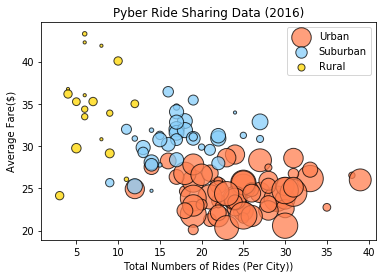

In [5]:
# Obtain the x and y coordinates for each of the three city types
urban_df = combined_df.loc[(combined_df["type"] == "Urban")]
suburban_df = combined_df.loc[(combined_df["type"] == "Suburban")]
rural_df = combined_df.loc[(combined_df["type"] == "Rural")]

# Average Fare ($) Per City
avg_urban_fare = urban_df.groupby("city")["fare"].mean()
avg_suburban_fare = suburban_df.groupby("city")["fare"].mean()
avg_rural_fare = rural_df.groupby("city")["fare"].mean()

#Total Number of Rides Per City
total_rides_urban = urban_df.groupby("city")["ride_id"].count()
total_rides_suburban = suburban_df.groupby("city")["ride_id"].count()
total_rides_rural = rural_df.groupby("city")["ride_id"].count()

# Total Number of Drivers Per City
total_drivers_urban = urban_df.groupby("city")["driver_count"].mean()
total_drivers_suburban = suburban_df.groupby("city")["driver_count"].mean()
total_drivers_rural = rural_df.groupby("city")["driver_count"].mean()

# Build the scatter plots for each city types
# Urban
plt.scatter(total_rides_urban, avg_urban_fare, s=total_drivers_urban*10, marker="o", facecolors="coral", edgecolors="black",alpha=0.75, label="Urban")
#Suburban
plt.scatter(total_rides_suburban, avg_suburban_fare, s=total_drivers_suburban*10, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75,label="Suburban")
#Rural
plt.scatter(total_rides_rural, avg_rural_fare, s=total_drivers_rural*10, marker="o", facecolors="gold", edgecolors="black",alpha=0.75, label="Rural" )

# Incorporate the other graph properties
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
plt.legend(loc="upper right")

# Incorporate a text label regarding circle size
plt.savefig("Images/PyberRideSharing.png")

# Show plot
plt.show()

## Total Fares by City Type

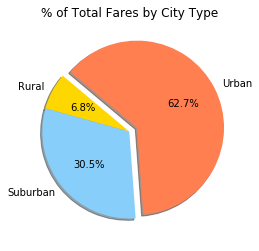

In [6]:
# Calculate Type Percents
type_grouped = combined_df.groupby(['type'])
total_fare = type_grouped['fare'].sum()

# Build Pie Chart

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "coral"]
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/TotalFaresbyCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

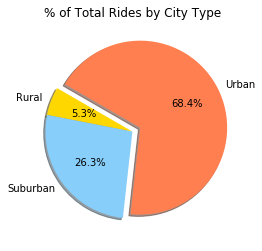

In [7]:
# Calculate Ride Percents
total_rides = type_grouped['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "coral"]
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesbyCityType.png")

# Show Figure
plt.show()

In [8]:
#Total Rides by City Type

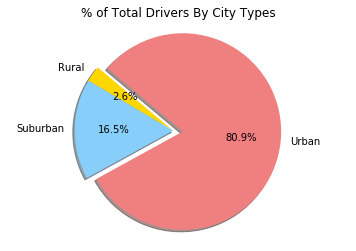

In [9]:
# Calculate Total Drivers by City Type

total_drivers = city_df.groupby(['type'])['driver_count'].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Images/% of Total Drivers By City Types.png")

# Show Figure
plt.show()